# Predicting Home Values


# Goals
* Discover drivers that have a string relationship to predict values.
* Use drivers to develop a machine learning model to make accurate predictions. 
* Home values will be compared to actual home values. 
* This information could be used to better understand changing markets.

## Imports

In [1]:
# importing the necessary libraries to run the code
from env import get_db_url
import wrangle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


from explore import combo_bed_bath_1M, bed_bath_count_over_1M, relplot_var, one_two_bedrooms
# from explore import monthly_v_churn, hyp_month_v_churn, t_test_monthly_churn, chi2_payment_churn

# from modeling import model_prep_data, model_decision_tree, model_knn
# from modeling import model_random_forest, model_log, model_knn_test

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquired the data from CodeUp database
* Data size ---- rows and --- columns.
* Each obsevation represent the sale of a property
* Each column reperesents a feature or data point of that sale

## Prepare

* Removed columns that did not contain useful information
* Checked for nulls in the data 
* Checked that column data types were appropriate
* Split data into train, validate and test (approx. --/--/--)
* Outliers have not been removed for this iteration of the project

In [2]:
# used my wrangle function that acquires, preps and cleans the data
df = wrangle.wrangle_zillow()

# splits data train, validate, test
train, validate, test = wrangle.split_clean_zillow()

# Data At a Glance

In [3]:
train.head()

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
30707,3.0,4.0,1965.0,6037.0,194803.0,97330.0
20167,1.5,3.0,1363.0,6059.0,338024.0,97063.0
24162,2.0,3.0,1262.0,6037.0,55863.0,96361.0
30921,2.0,3.0,1921.0,6037.0,700112.0,96387.0
49586,4.0,6.0,3174.0,6037.0,885972.0,96517.0


In [4]:
train.describe()


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
count,31164.000000,31164.000000,31164.000000,31164.000000,3.116400e+04,31164.000000
mean,2.287848,3.291266,1905.043897,6049.099410,5.169842e+05,96643.405468
std,0.981549,0.908149,942.390865,21.052046,6.602886e+05,4874.109337
min,0.000000,0.000000,128.000000,6037.000000,3.254000e+03,95982.000000
25%,2.000000,3.000000,1268.000000,6037.000000,1.939980e+05,96208.000000
50%,2.000000,3.000000,1656.000000,6037.000000,3.727900e+05,96412.000000
75%,3.000000,4.000000,2298.000000,6059.000000,6.127742e+05,96995.000000
max,7.500000,6.000000,12056.000000,6111.000000,2.538125e+07,399675.000000


# Explore

## * What combination of Bathrooms and Bedrooms have greater Value

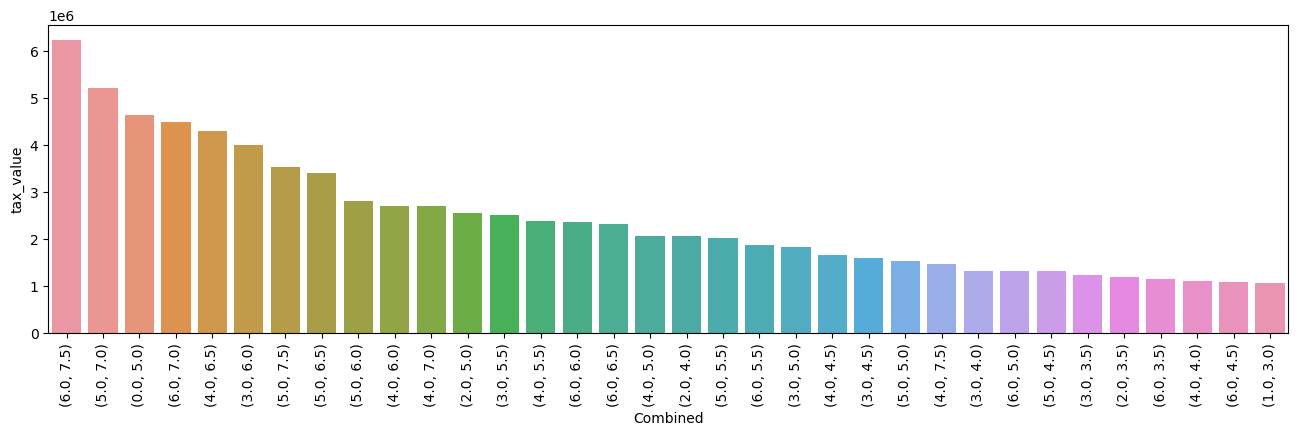

In [5]:
combo_bed_bath_1M()

In [6]:
x_list, y_list = bed_bath_count_over_1M()

In [7]:
display(x_list, y_list)

,count
0,
4.0,8
6.0,8
5.0,7
3.0,6
2.0,3
0.0,1
1.0,1


,count
0,
5.0,6
4.5,4
5.5,4
6.0,4
3.5,3
4.0,3
6.5,3
7.0,3
7.5,3


### Takeaways:

* Certain bedrooms numbers are associated with million dollar home values
* Bathrooms don't have the same pattern but rather 4.5 - 6 bathrooms are associated with million dollar homes

## * What Square footage has the greater impact on Value?



<Figure size 2000x900 with 0 Axes>

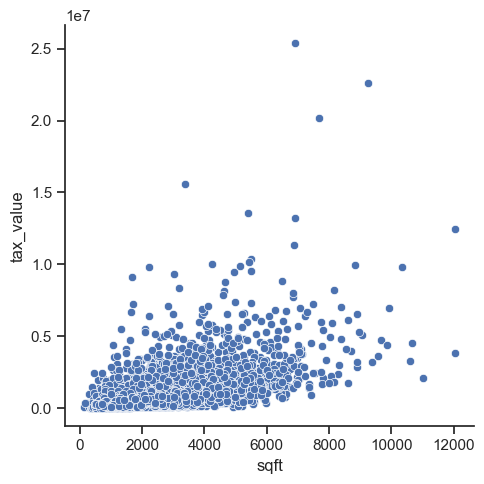

In [8]:
relplot_var(train)

### Takeaways:
* Most churn happens with the month-to-month customer
* Customers with the most retention are on two year plans
* The month most churn happens is the first month of contract with month to month customers 

---

# Evaluation Question:
    
## * Is properties with more square footages significantly have more value?
### * I will preform a Pearson-R to show square footage has no carrelationn to Value

I will use a confidence interval of 95%\
The resulting alpha is .05

## Hypothesis:
H-o = There is no linear correlation betweeen Square Footage and Home Value.\
H-a = There is a linear correlation betweeen Square Footage and Home Value

In [9]:
test_results = stats.pearsonr(train.sqft, train.tax_value)
test_results


PearsonRResult(statistic=0.5814200017157635, pvalue=0.0)

In [11]:
r, p = test_results

print(f'p is {p:.10f}')
print(f'''The p-value is near zero. Therefore, we have evidence to 
support that the square footage has a relation with home value. Based on this, 
I believe that using "tax_value" will provide a moderate improvement in the model's accuracy.''')


p is 0.0000000000
The p-value is near zero. Therefore, we have evidence to 
support that the square footage has a relation with home value. Based on this, 
I believe that using "tax_value" will provide a moderate improvement in the model's accuracy.


## * Is having 1 bathroom worse for property value than having 2 bedrooms?

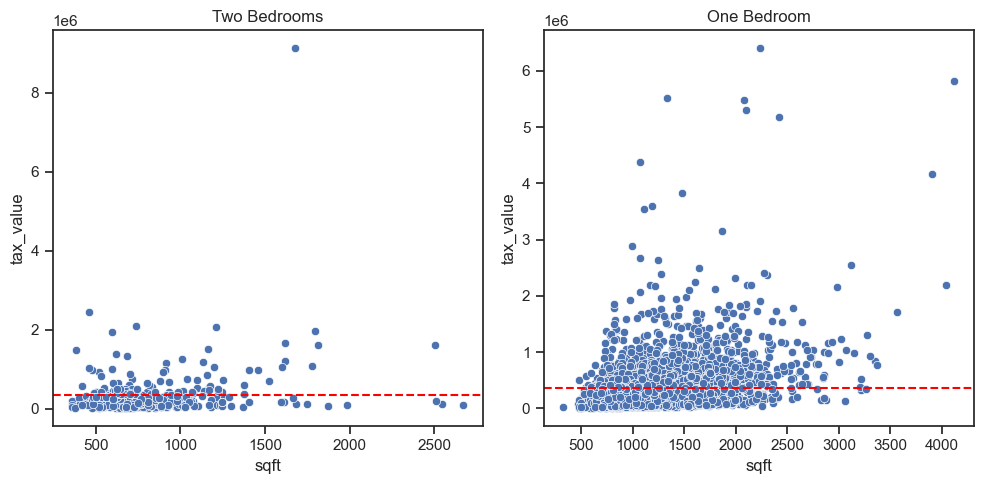

In [9]:
one_two_bedrooms()

### Takeaways:
* There were a total of 4964 one Bedroom properties
* There were a total of 362 two Bedroom properties
* The average One Bedroom is \$35,3655
* The average Two Bedroom is \$34,1589

# Evaluation Question:
## * Are charges of customers who churn significantly greater than who do not churn?

#### *  I will preform a T-test to show if that customers who spend more monthly have a greater churn rate

---
+ I will use a confidence interval of 95%
+ The resulting alpha is .05

### Hypothesis:

* H-o = Charges of customers is equal or less than who don't churn.
* H-a = Charges of customers is greater than who don't churn.

In [ ]:
hyp_month_v_churn()

In [ ]:
t, p = t_test_monthly_churn()
print(f'p = {p}')
print(f't = {t}')

#### The p-value is less than the alpha. Therefore, we have evidence to support that the mean charge difference of customer who pay more mothly is significantly different from the mean charge difference of customer who pay less mothly. Based on this, and the ~\$15 difference in medians, observed in the train data, I believe that using "monthly_charges" during modeling will provide a moderate improvement in the model's accuracy.

## Modeling

* Customers who do not churn makeup 73% of the data
* By assuming non-churner a 73% baseline accuracy is achieved
* I will compare how each model runs using various hyperparameters
* I will compare the train with validate data
* I will use accuracy as my evaluation metric
* The best preforming model will be used on my test data

### Prep Data

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model_prep_data()

# -----

In [ ]:
model_decision_tree(X_train, X_validate, y_train, y_validate)

* Decision Tree accuracy is 3 points better than baseline


## ---- model

In [ ]:
model_knn(X_train, X_validate, y_train, y_validate)

* KNN accuracy is 2 points better than baseline


# ----- Model

In [ ]:
model_random_forest(X_train, X_validate, y_train, y_validate)

* Random Forest accuracy is 3 points better than baseline


# ------ Model

In [ ]:
model_log(X_train, X_validate, y_train, y_validate)

* Log Regression accuracy is 35 points worse than baseline


# Comparing Summary
* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* The Logistic Regression model preformed poorly. I may need to revisit and see where mistakes may have been made.

* The KNN Model was selected to run the test data. This model also was 2 points better than baseline but seemed to be most stable when charting the resukts.

# KNN Model Testing

In [ ]:
model_knn_test(X_train, X_test, y_train, y_test)


## Modeling Summary

* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* Knn Model preformed slighlty better than baseline

# Conclusion

## Exploration Summary
* Customers with Fiber Optics have more churn than DSL.
* Encouraging customers to be on automatic payment plan will seems to reduce churn.
* 643 manual check writers churned which is a 45% churn rate for all payment types.
* When the monthly charges reached approximate \$70 the churn rate rised.
* The median monthly payment for customers who churns is \$79.70


## Modeling
* The final model failed to significantly outperform the baseline. Possible reasons include:

“payment_type” and “contract_type” may not have had meaningful relation to who will churn.
Since monthly charges" seems to be a larger contributor to churn, adding more of the services to see which service may be contributing to churn. 

## Recommendations
* This may be simple enough but have a column for reason for caneling service. Helpful to pinpoint issues and improve service.

## Next Steps
* Explore the relation of Fiber Optics to churn. Services like tech support or streaming services could also be explored.

In [ ]:
has_churned = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
df = pd.DataFrame(has_churned, columns=['churned'])

In [ ]:
df

In [ ]:
baseline = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df1 = pd.DataFrame(baseline, columns=['baseline'])
df1

In [ ]:
from sklearn.metrics import confusion_matrix

true_labels = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

cm = confusion_matrix(true_labels, predicted_labels)
print(cm.T)


In [ ]:
from sklearn.metrics import confusion_matrix

true_labels = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

cm = confusion_matrix( predicted_labels, true_labels)
print(cm)